
# Volume 2: Gymnasium



Danny Perkins
MATH 323
2/15/24





In [3]:
import gymnasium as gym
import numpy as np
import random
from matplotlib import pyplot as plt
from IPython import display

# Problem 1

*   Implement `random_blackjack()`.
*   Run the game 50,000 times and print the percentage of games won.



In [53]:
# Problem 1
def random_blackjack(n):
    """ Play a random game of Blackjack. Determine the percentage 
        the player wins out of n times.
    Parameters:
        n (int): number of iterations
    Returns:
        percent (float): percentage that the player wins
    """
    wins = 0  # to store the number of wins
    for i in range(n):
        done = False # game is not done at start
        env = gym.make('Blackjack-v1')  # Initialize environment
        env.reset()    # Reset enviornment
        while not done:   # Make actions until the game is done
            random_action = env.action_space.sample()  # Select a random action
            obs, reward, done, trunc, info = env.step(random_action)  # perform the action
            if reward == 1.: wins += 1
    env.close()   # close it
    return wins / n  # return win percentage

In [54]:
print(random_blackjack(50000))  # Print win percentage after 50,000 games

0.28318


# Problem 2

* Implement `blackjack()`.
* For `n` = 1, 2, ..., 21, plot the win percentage after 10,000 games of Blackjack.
* Identify which value(s) of `n` gives the highest win rate.

In [197]:
# Problem 2
def blackjack(n=11):
    """ Play blackjack with naive algorithm.
    Parameters:
        n (int): maximum accepted player hand
    Return:
        percent (float): percentage wins over 10000 iterations
    """
    wins = 0  # to store the number of wins
    N = 10000  # Will run it 10000 times
    for i in range(N):
        done = False # game is not done at start
        env = gym.make('Blackjack-v1')  # Initialize environment
        sum = env.reset()[0][0]    # Reset enviornment and store the sum
        while not done:   # Make actions until the game is done
            if sum <= n: 
                action = 1  # If less than n, draw another card
            else: action = 0
            obs, reward, done, trunc, info = env.step(action)  # perform the action
            sum = obs[0]   # Set new sum attribute
            if reward == 1.: wins += 1   # Add to win total
        env.close()   # close it
    return wins / N # return win percentage

The value of n that wins the most is: 13


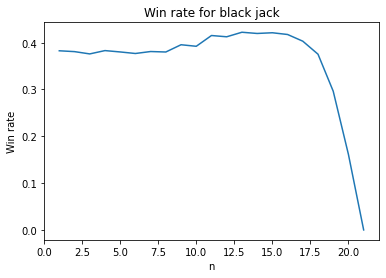

In [200]:
ns = np.arange(1, 22)
win_rates = []

for n in ns:   # calculate win rate for each n
    win_rate = blackjack(n=n)
    win_rates.append(win_rate)

print("The value of n that wins the most is:", np.argmax(win_rates) + 1)

# Plot it
plt.plot(ns, win_rates)
plt.xlabel("n")
plt.ylabel("Win rate")
plt.title("Win rate for black jack")
plt.show()


*Identify which value(s) give the highest win-rate here*

The value of n with the highest win rate is 13

I was surprised to see that it makes a minimal difference as n increases to 13. But, after, the win rate dramatically decreases. This is probably because the game already starts with a few cards.

# Problem 3

* Implement `cartpole()`.
* Render the game and run your function once.
* Run Cartpole 100 times (without rendering) and print out the average number of steps before it terminates.

In [84]:
# Problem 3
def cartpole(render=False):
    """ Solve CartPole-v1 by checking the velocity of the tip 
        of the pole.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    env = gym.make('CartPole-v1', render_mode='rgb_array')  # Initialize environment
    observation, info = env.reset()  # Reset enviornment and store the sum
    angle = observation[-1]  # Find starting angle

    if(render): img = plt.imshow(env.render())   # Render the first game

    done = False
    steps = 0
    while not done:
        # Take an educated step based on the angle
        steps += 1
        if angle < 0: action = 0
        else: action = 1

        obs, reward, done, trunc, info = env.step(action)
        angle = obs[-1]

        if(render):
            img.set_data(env.render())  # Update visualization
            display.display(plt.gcf())
            display.clear_output(wait=True)
    env.close()

    return steps

179

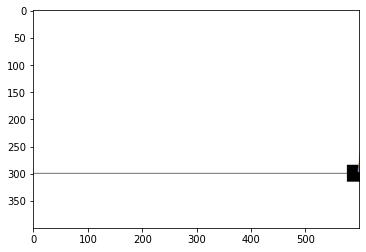

In [48]:
# Render the game and run once here
cartpole(True)

In [88]:
# Run the game here and print average steps to termination
num_steps = []
for i in range(100):
    num_steps.append(cartpole())
print("Average number of steps", np.mean(num_steps))

Average number of steps 201.15


# Problem 4

* Implement `car()`.
* Render the game and run your function once.
* Run MountainCar 100 times (without rendering) and print out the average number of steps before it terminates.

In [89]:
# Problem 4
def car(render=False):
    """ Solve MountainCar-v0 by checking the position of the car.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    env = gym.make('MountainCar-v0', render_mode='rgb_array')  # Initialize environment
    observation, info = env.reset()  # Reset enviornment and store the sum
    x, v = observation

    if(render): img = plt.imshow(env.render())   # Render the first game

    done = False
    steps = 0
    while not done:
        # Take an educated step based on the angle
        steps += 1
        if(v > 0): action = 2
        else: action = 0

        obs, reward, done, trunc, info = env.step(action)
        x, v = obs

        if(render):
            img.set_data(env.render())  # Update visualization
            display.display(plt.gcf())
            display.clear_output(wait=True)
    env.close()

    return steps

158

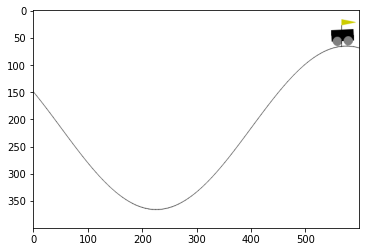

In [80]:
# Render the game here
car(True)

In [90]:
# Run the game here and print average steps to termination
num_steps = []
for i in range(100):
    num_steps.append(car(False))
print("Average number of steps", np.mean(num_steps))

Average number of steps 128.45


## Helper Function for Problem 5

In [104]:
def find_qvalues(env, alpha=.1, gamma=.6, epsilon=.1):
    """ Use the Q-learning algorithm to find qvalues.
    Parameters:
        env (str): environment name
        alpha (float): learning rate
        gamma (float): discount factor
        epsilon (float): maximum value
    Returns:
        q_table (ndarray nxm)
    """
    env = gym.make(env)  # Make environment
    # Make Q-table
    q_table = np.zeros((env.observation_space.n, env.action_space.n))

    # Train
    for i in range(1,100001):
        state, info = env.reset()  # Reset state

        epochs, penalties, reward, = 0,0,0
        done = False
        while not done:
            # Accept based on epsilon
            if random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            # Take action
            next_state, reward, done, truncated, info = env.step(action)

            # Calculate new qvalue
            old_value = q_table[state,action]
            next_max = np.max(q_table[next_state])

            new_value = (1-alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            # Check if penalty is made
            if reward == -10:
                penalties += 1

            # Get next observation
            state = next_state
            epochs += 1

        # Print episode number
        if i % 100 == 0:
            display.clear_output(wait=True)
            print(f"Episode: {i}")

    env.close()
    print("Training finished.")
    return q_table

# Problem 5

* Initialize the "`Taxi-v3`" environment (without rendering), act randomly until it terminates, and print the total reward
* Render the "`Taxi-v3`" environment, use the Q-table to act optimally until it terminates, and print the total reward
* Implement `taxi()`, then use it to print the average total reward for each algorithm.


In [102]:
# Random actions Taxi game
total_reward = 0  # to store the number of wins
done = False
env = gym.make('Taxi-v3')  # Initialize environment
env.reset()    # Reset enviornment
while not done:   # Make actions until the game is done
    random_action = env.action_space.sample()  # Select a random action
    obs, reward, done, trunc, info = env.step(random_action)  # perform the action
    total_reward += reward
env.close()   # close it
print("Total Reward:", total_reward)

Total Reward: -8496


In [106]:
# Q-table actions Taxi game
Q = find_qvalues('Taxi-v3')

Episode: 100000
Training finished.


Total Reward: 10


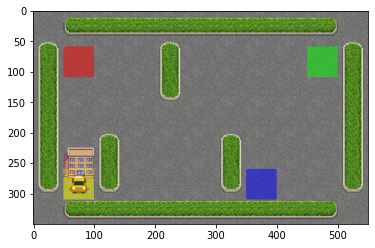

In [132]:
env = gym.make('Taxi-v3', render_mode='rgb_array')  # Make environment
obs, info = env.reset()
img = plt.imshow(env.render())   # Render the game
done = False
total_reward = 0

while not done:
    # Take an educated step based on the Q table
    action = np.argmax(Q[obs,:])
    obs, reward, done, trunc, info = env.step(action)

    img.set_data(env.render())  # Update visualization
    display.display(plt.gcf())
    display.clear_output(wait=True)

    total_reward += reward  # Compute reward
env.close()

print("Total Reward:", total_reward)

In [144]:
def taxi(q_table):
    """ Compare naive and q-learning algorithms.
    Parameters:
        q_table (ndarray nxm): table of qvalues
    Returns:
        naive (float): mean reward of naive algorithm
                       of 1000 runs
        q_reward (float): mean reward of Q-learning algorithm
                       of 1000 runs
    """
    Random_Wards = []
    Q_rewards = []

    for i in range(1000):
        total_reward = 0  # to store the number of wins
        done = False
        env = gym.make('Taxi-v3')  # Initialize environment
        env.reset()    # Reset enviornment
        while not done:   # Make actions until the game is done
            random_action = env.action_space.sample()  # Select a random action
            obs, reward, done, trunc, info = env.step(random_action)  # perform the action
            total_reward += reward
        env.close()   # close it
        Random_Wards.append(total_reward)

    for i in range(1000):
        env = gym.make('Taxi-v3')  # Make environment
        obs, info = env.reset()
        done = False
        total_reward = 0

        while not done:
            # Take an educated step based on the Q table
            action = np.argmax(Q[obs,:])
            obs, reward, done, trunc, info = env.step(action)
            total_reward += reward  # Compute reward
        Q_rewards.append(total_reward)
        env.close()

    return np.mean(Random_Wards), np.mean(Q_rewards)

In [147]:
# Print the average rewards of the Taxi game for both algorithms ran 1000 times
Random_reward, Q_reward = taxi(Q)
print("Total Reward For Naive Method:", Random_reward)
print("Total Reward For Q-Learning:", Q_reward)

Total Reward For Naive Method: -9161.572
Total Reward For Q-Learning: 7.917
